## Import Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
# from the output, we can see that we have 14 columns and 1000 rows.
df.shape

(1000, 14)

In [4]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


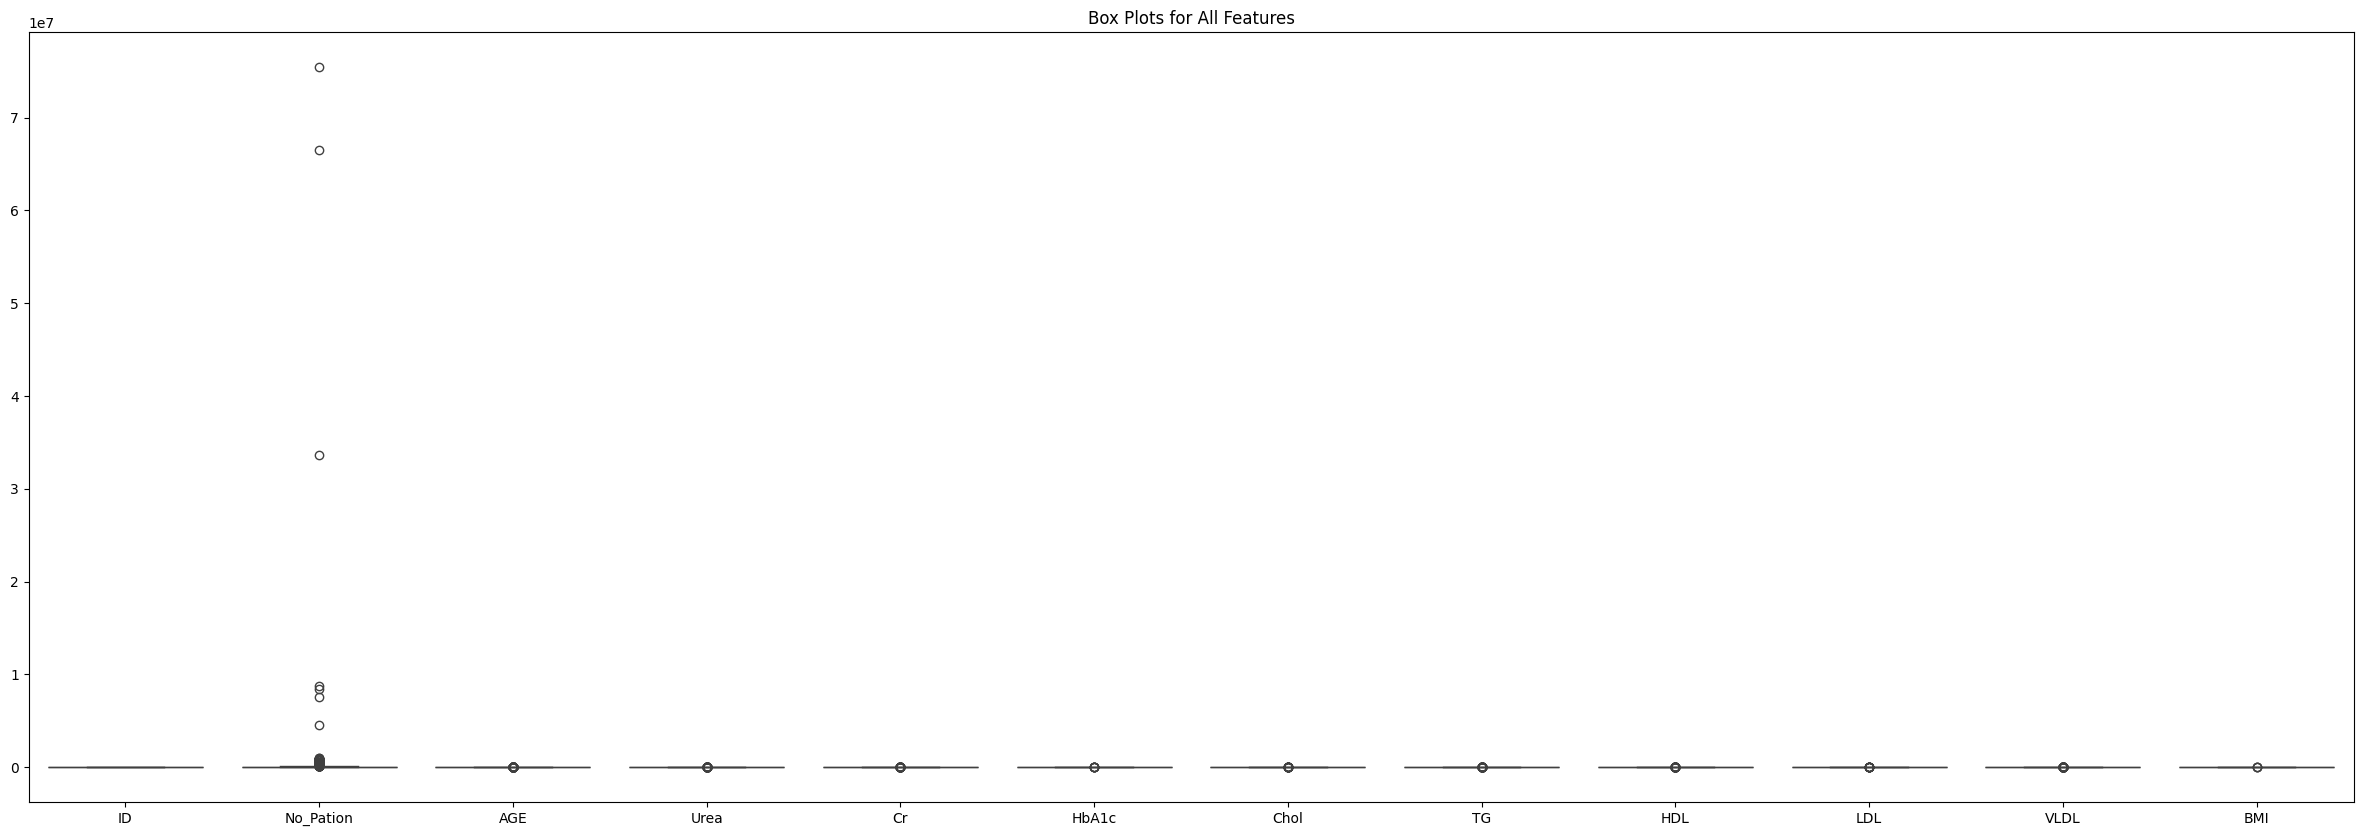

In [6]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df)
plt.title('Box Plots for All Features')
plt.show()

In [7]:
df.isnull().sum() #checks the sum of true null values for each column

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [8]:
# Rename the colummn from No_Pation to No_Patient
df.rename(columns={'No_Pation':'No_Patient'}, inplace=True)

In [9]:
# Let's check the range of values in the No_Patient column
df['No_Patient'].unique()


array([   17975,    34221,    47975,    87656,    34223,    34224,
          34225,    34227,    34229,    34230,    34231,    34232,
          46815,    34234,    34235,    34236,    34237,    87654,
          34238,    34239,    34240,    12744,    34302,    34282,
          34242,    46675,    45566,    34309,    87664,    34245,
          34246,    34294, 75435657,    87655,    34290,    34248,
          34249,    34298,    34250,    34251,    34299,    34285,
          48759,    34293,     6402,    34254,    78554,    34255,
          34517,    34257,    34258,    34259,    34260,    34261,
          34262,    34295,    34264,    34271,    34273,    34274,
          34275,    34277,    34281,    21354,    85922,   568412,
           1168,   789566,    85764,    86745,   741741,    21747,
           4172,    42585,     8572,    78585,    57252,    45396,
          45367,    45388,    45399,    45389,    45374,    45410,
          45377,    45390,    45365,    45381,    45382,    45

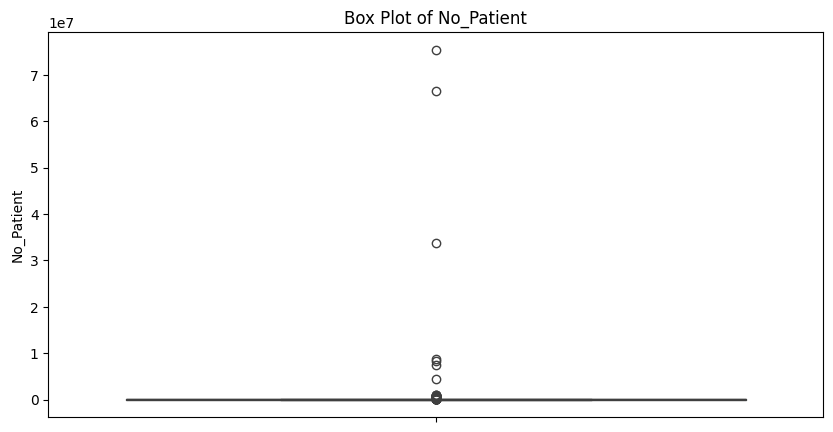

In [10]:
# We can now start with the outliers detection and removal
# let's view the box plot of the No_Pation column
plt.figure(figsize=(10, 5))
sns.boxplot(df['No_Patient'])
plt.title('Box Plot of No_Patient')
plt.show()

In [11]:
# After Checking, we can see that the No_Patient is not a desired column for our classification model
# It is the same as the ID column, so we can drop it
df_edit = df.drop('No_Patient', axis=1) 

In [12]:
df_edit.drop('ID', axis=1, inplace=True)
df_edit.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


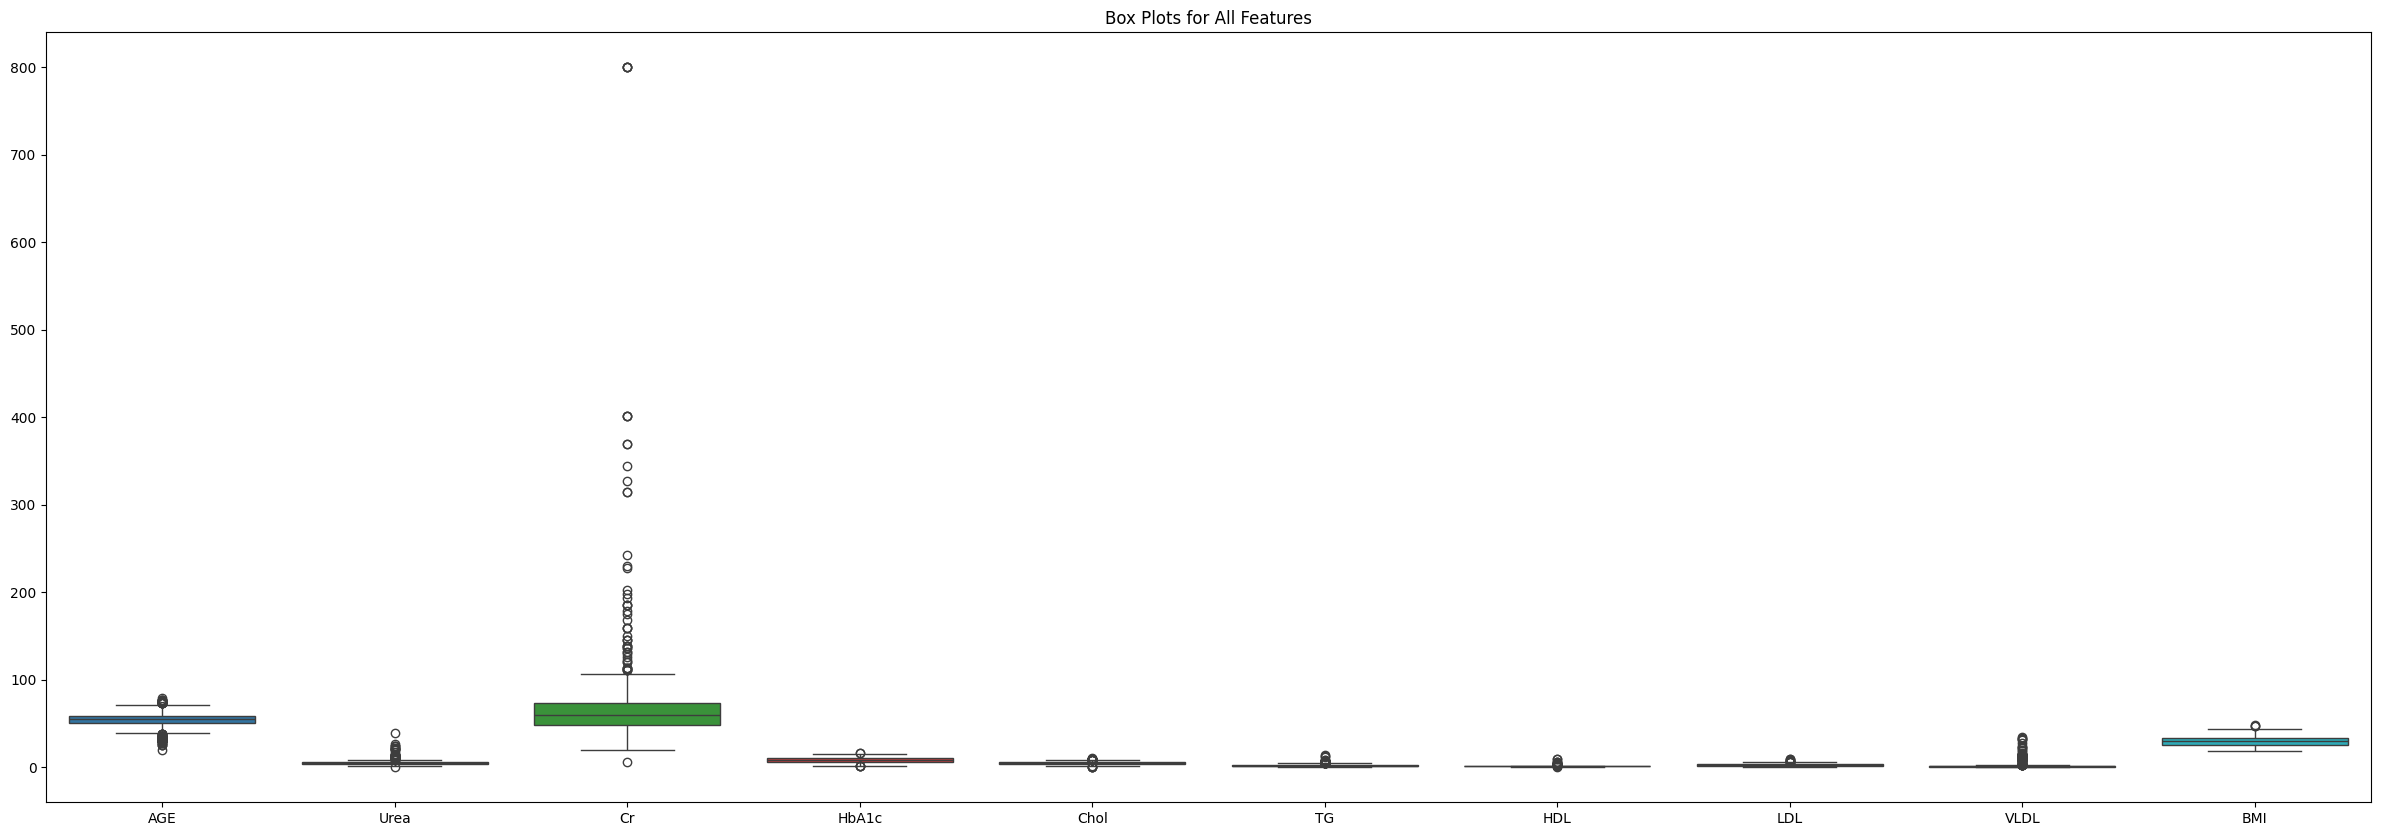

In [13]:
# Let's re explore the box plot of the features
plt.figure(figsize=(30, 10))
sns.boxplot(data=df_edit)
plt.title('Box Plots for All Features')
plt.show()

In [14]:
df_edit['AGE'].value_counts()

AGE
55    181
60     88
54     84
51     51
61     49
56     48
52     44
50     43
59     32
57     31
58     30
63     29
53     25
30     20
49     19
33     16
45     16
44     13
40     13
66     11
35     11
42     10
48     10
47     10
31      9
39      9
62      8
68      8
43      8
73      8
64      7
38      6
69      6
67      6
41      5
34      5
77      4
36      4
76      4
28      3
46      3
26      2
70      2
75      2
65      2
32      1
25      1
79      1
20      1
71      1
Name: count, dtype: int64

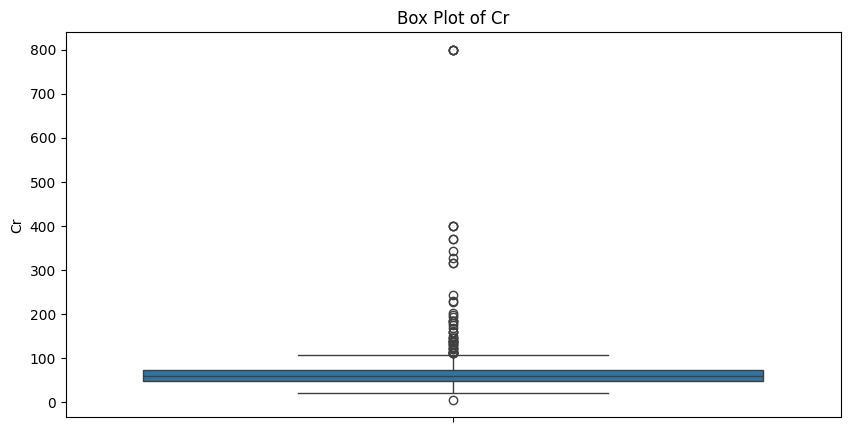

In [15]:
# Let's check the box plot of the CR column
plt.figure(figsize=(10, 5))
sns.boxplot(df_edit['Cr'])
plt.title('Box Plot of Cr')
plt.show()


In [16]:
# Now we will remove the group of Cr values that are greater than 300
df_edit = df_edit[df_edit['Cr'] <= 300]

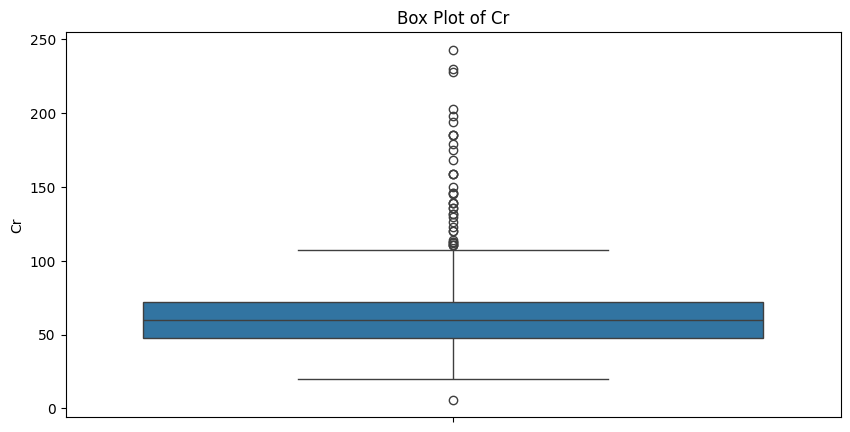

In [17]:
# Let's check the box plot of the Cr column
plt.figure(figsize=(10, 5))
sns.boxplot(df_edit['Cr'])
plt.title('Box Plot of Cr')
plt.show()


In [18]:
# Let's apply now the needed standardization to the data
numeric_features = df_edit.select_dtypes(include=[np.number])
numeric_features = numeric_features.columns
numeric_features

Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')

In [19]:
scaler = StandardScaler()
df_edit[numeric_features] = scaler.fit_transform(df_edit[numeric_features])
df_edit.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,-0.398939,-0.109996,-0.674888,-1.331159,-0.511039,-1.039290,1.810300,-1.082131,-0.369633,-1.117234,N
1,M,-3.123873,-0.189286,-0.051514,-1.331159,-0.895183,-0.677797,-0.159423,-0.455012,-0.342492,-1.318922,N
2,F,-0.398939,-0.109996,-0.674888,-1.331159,-0.511039,-1.039290,1.810300,-1.082131,-0.369633,-1.117234,N
3,F,-0.398939,-0.109996,-0.674888,-1.331159,-0.511039,-1.039290,1.810300,-1.082131,-0.369633,-1.117234,N
4,M,-2.329100,0.841489,-0.674888,-1.331159,0.026762,-0.966991,-0.613975,-0.544601,-0.396773,-1.722297,N


In [20]:
categorical_features = df_edit.select_dtypes(include=[object])
categorical_features = categorical_features.columns
categorical_features

Index(['Gender', 'CLASS'], dtype='object')

In [21]:
# First, let's explore the count values of the categorical features
for col in categorical_features:
    print(f'{col} : {df_edit[col].value_counts()}')

Gender : Gender
M    555
F    431
f      1
Name: count, dtype: int64
CLASS : CLASS
Y     828
N     102
P      52
Y       4
N       1
Name: count, dtype: int64


In [22]:
df_edit['Gender'] = df_edit['Gender'].replace('f', 'F')

# Verify the replacement
print(df_edit['Gender'].value_counts())

Gender
M    555
F    432
Name: count, dtype: int64


In [23]:
# Now we will encode the categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    df_edit[col] = label_encoder.fit_transform(df_edit[col])

df_edit.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,-0.398939,-0.109996,-0.674888,-1.331159,-0.511039,-1.039290,1.810300,-1.082131,-0.369633,-1.117234,0
1,1,-3.123873,-0.189286,-0.051514,-1.331159,-0.895183,-0.677797,-0.159423,-0.455012,-0.342492,-1.318922,0
2,0,-0.398939,-0.109996,-0.674888,-1.331159,-0.511039,-1.039290,1.810300,-1.082131,-0.369633,-1.117234,0
3,0,-0.398939,-0.109996,-0.674888,-1.331159,-0.511039,-1.039290,1.810300,-1.082131,-0.369633,-1.117234,0
4,1,-2.329100,0.841489,-0.674888,-1.331159,0.026762,-0.966991,-0.613975,-0.544601,-0.396773,-1.722297,0


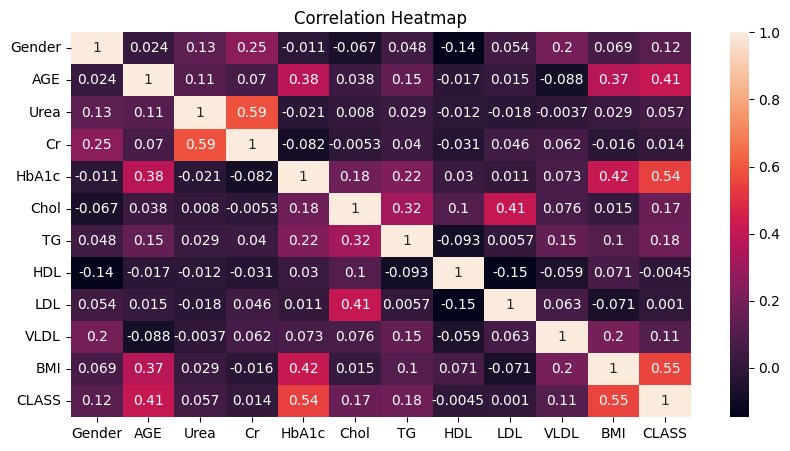

In [24]:
# Let's check the correlation of the features
plt.figure(figsize=(10, 5))
sns.heatmap(df_edit.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Now we will split the data into features and target
X = df_edit.drop('CLASS', axis=1)
y = df_edit['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (789, 11)
X_test shape: (198, 11)
y_train shape: (789,)
y_test shape: (198,)


In [30]:
#First we will create an object from the logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, random_state = 0)

In [31]:
#Now we will train this model
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [32]:
#Let's assign the prediction from the x_test
y_pred = logmodel.predict(X_test)

In [34]:
#The accuracy score is here
from sklearn.metrics import accuracy_score
accuracy_log = accuracy_score(y_test, y_pred)
accuracy_log

0.9393939393939394

In [36]:

#Finally, the classification report is here
from sklearn.metrics import classification_report
class_rep_log = classification_report(y_test, y_pred)
print(class_rep_log)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           2       0.50      0.29      0.36         7
           3       0.96      0.98      0.97       169
           4       0.00      0.00      0.00         1

    accuracy                           0.94       198
   macro avg       0.57      0.54      0.55       198
weighted avg       0.93      0.94      0.93       198



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [37]:
#First we will create an object from the knn
from sklearn.neighbors import KNeighborsClassifier
knnmod = KNeighborsClassifier(n_neighbors = 5)

In [38]:
#Now we will train this model
knnmod.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#The accuracy score is here
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.9393939393939394

In [40]:
#Finally, the classification report is here
from sklearn.metrics import classification_report
class_rep_knn = classification_report(y_test, y_pred)
print(class_rep_knn)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           2       0.50      0.29      0.36         7
           3       0.96      0.98      0.97       169
           4       0.00      0.00      0.00         1

    accuracy                           0.94       198
   macro avg       0.57      0.54      0.55       198
weighted avg       0.93      0.94      0.93       198



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [41]:
#First we will create an object from the decision tree
from sklearn.tree import DecisionTreeClassifier
decisionmod = DecisionTreeClassifier(random_state=1)

In [42]:
#Now we will train this model
decisionmod.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
#Let's assign the prediction from the x_test
y_pred = decisionmod.predict(X_test)

In [44]:
#The accuracy score is here
accuracy_decision = accuracy_score(y_test, y_pred)
accuracy_decision

0.9747474747474747

In [45]:
#Finally, the classification report is here
class_rep_decision = classification_report(y_test, y_pred)
print(class_rep_decision)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           2       1.00      1.00      1.00         7
           3       0.98      0.99      0.99       169
           4       0.00      0.00      0.00         1

    accuracy                           0.97       198
   macro avg       0.73      0.72      0.73       198
weighted avg       0.97      0.97      0.97       198



In [51]:
#First we will create an object from the random forest
from sklearn.ensemble import RandomForestClassifier
randommod = RandomForestClassifier(random_state=42, n_estimators=100)



In [52]:
#Now we will train this model
randommod.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
#Let's assign the prediction from the x_test
y_pred = randommod.predict(X_test)


In [54]:
#The accuracy score is here
from sklearn.metrics import accuracy_score
accuracy_random = accuracy_score(y_test, y_pred)
accuracy_random

0.9747474747474747

In [55]:
#Finally, the classification report is here
from sklearn.metrics import classification_report
class_rep_random = classification_report(y_test, y_pred)
print(class_rep_random)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           2       1.00      1.00      1.00         7
           3       0.99      0.98      0.99       169
           4       0.00      0.00      0.00         1

    accuracy                           0.97       198
   macro avg       0.72      0.73      0.73       198
weighted avg       0.98      0.97      0.97       198



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17104\3589864635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='Blues')


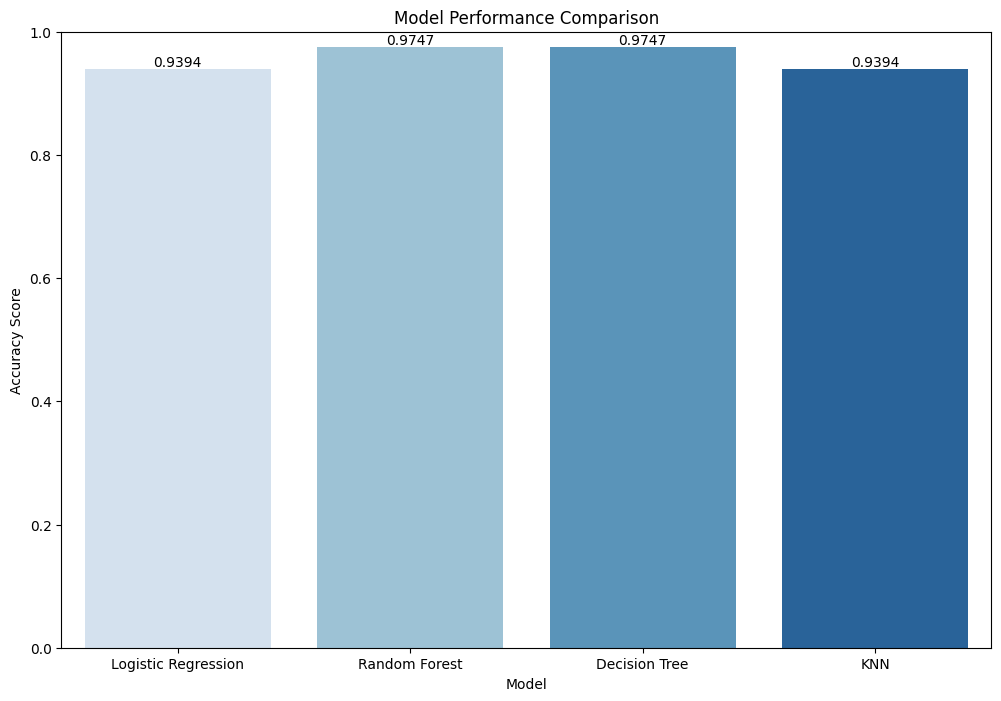

In [56]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
scores = [accuracy_log, accuracy_random, accuracy_decision, accuracy_knn]

plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=scores, palette='Blues')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

# Adding error bars to represent variability
for i, score in enumerate(scores):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center', va='bottom', color='black')

plt.show()